In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

Welcome to JupyROOT 6.26/04


In [174]:

base_file_loc = '/media/jykim/T7/storage/01_recon/v15_sig_ext_sigbkg_1ab/'
Vg_ccbar = base_file_loc + 'topo/resultfile/result_rho/standard.root'
Vg_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
Vg_ccbar = base_file_loc + 'topo/resultfile/result_omega/standard.root'

# phigamma_ccbar = '/media/jykim/T7/storage/01_recon/merge_generic_bkg/ccbar/topo/trainv2_sigbkg_sigextract_phi/topoana.root'
# phigamma_uubar = '/media/jykim/T7/storage/01_recon/merge_generic_bkg/uubar/train_v2_signalextraction_sigbkg_uubar_recon_output_0*.root'
# phigamma_ddbar = '/media/jykim/T7/storage/01_recon/merge_generic_bkg/ddbar/train_v2_signalextraction_sigbkg_ddbar_recon_output_0*.root'
# phigamma_ssbar = '/media/jykim/T7/storage/01_recon/merge_generic_bkg/ssbar/train_v2_signalextraction_sigbkg_ssbar_recon_output_0*.root'
# phigamma_charged = '/media/jykim/T7/storage/01_recon/merge_generic_bkg/charged/train_v2_signalextraction_sigbkg_charged_recon_output_0*.root'
# phigamma_mixed = '/media/jykim/T7/storage/01_recon/merge_generic_bkg/mixed/train_v2_signalextraction_sigbkg_mixed_recon_output_0*.root'
# phigamma_taupair = '/media/jykim/T7/storage/01_recon/merge_generic_bkg/taupair/train_v2_signalextraction_sigbkg_taupair_recon_output_0*.root'


ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<1.90 && ( iCascDcyBrP_Dst_0 ==0 || iCascDcyBrP_Dst_0 ==3)'
ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0!=0'

variables=['D0_M','D0_cosHel_0']
topo_variables=['D0_M','D0_cosHel_0','iCascDcyBrP_Dst_0']
tree='omega'

In [175]:
pd_Vgamma_ccbar = get_pd(file=Vg_ccbar, tree=tree,base_filter=ccbar_filter,variables=topo_variables)


In [176]:
pd_Vgamma_ccbar['iCascDcyBrP_Dst_0'].value_counts()

-1      891
 7      722
 4      533
 11     293
 25     262
       ... 
 107      1
 854      1
 421      1
 857      1
 745      1
Name: iCascDcyBrP_Dst_0, Length: 442, dtype: int64

In [177]:
pd_Vgamma_ccbar['iCascDcyBrP_Dst_0'].value_counts(normalize=True)

-1      0.161355
 7      0.130750
 4      0.096523
 11     0.053060
 25     0.047447
          ...   
 107    0.000181
 854    0.000181
 421    0.000181
 857    0.000181
 745    0.000181
Name: iCascDcyBrP_Dst_0, Length: 442, dtype: float64

In [178]:
pd_Vgamma_ccbar['iCascDcyBrP_Dst_0'].value_counts(normalize=True).tolist()

[0.16135458167330677,
 0.1307497283592901,
 0.09652299891343716,
 0.05306048533140167,
 0.047446577327055414,
 0.031148134733792104,
 0.027526258601955813,
 0.02173125679101775,
 0.021369069177834116,
 0.012857660268018834,
 0.01231437884824339,
 0.010865628395508874,
 0.009235784136182543,
 0.009235784136182543,
 0.009235784136182543,
 0.00796812749003984,
 0.007062658457080768,
 0.006700470843897139,
 0.0065193770373053244,
 0.006157189424121695,
 0.006157189424121695,
 0.00597609561752988,
 0.005795001810938066,
 0.005613908004346252,
 0.005432814197754437,
 0.005432814197754437,
 0.005251720391162622,
 0.0050706265845708075,
 0.004708438971387179,
 0.004527345164795364,
 0.004527345164795364,
 0.004527345164795364,
 0.004346251358203549,
 0.004346251358203549,
 0.004165157551611735,
 0.004165157551611735,
 0.004165157551611735,
 0.004165157551611735,
 0.00398406374501992,
 0.00398406374501992,
 0.0032596885186526622,
 0.0032596885186526622,
 0.0030785947120608474,
 0.00307859471206

In [179]:
topo_pd = pd_Vgamma_ccbar['iCascDcyBrP_Dst_0'].value_counts().to_frame()

In [180]:
topo_pd.iloc[0,0]

891

In [181]:
topo_pd.iloc[1,0]

722

In [182]:
topo_pd.iloc[2,0]

533

In [183]:
topo_pd.iloc[3,0]

293

In [184]:
list(topo_pd.index.values.tolist())

[-1,
 7,
 4,
 11,
 25,
 3,
 6,
 71,
 23,
 14,
 267,
 50,
 27,
 17,
 34,
 12,
 40,
 76,
 10,
 328,
 45,
 31,
 35,
 48,
 22,
 21,
 160,
 157,
 171,
 84,
 29,
 19,
 58,
 81,
 226,
 36,
 296,
 67,
 38,
 110,
 234,
 286,
 104,
 114,
 49,
 219,
 170,
 363,
 75,
 57,
 142,
 284,
 272,
 62,
 244,
 194,
 169,
 15,
 309,
 63,
 200,
 125,
 427,
 185,
 99,
 260,
 429,
 89,
 352,
 83,
 5,
 26,
 270,
 195,
 103,
 256,
 187,
 540,
 485,
 419,
 151,
 41,
 43,
 121,
 247,
 141,
 70,
 237,
 139,
 553,
 39,
 181,
 931,
 182,
 357,
 362,
 131,
 392,
 377,
 46,
 265,
 689,
 100,
 73,
 263,
 216,
 98,
 433,
 101,
 253,
 364,
 51,
 238,
 562,
 179,
 580,
 137,
 162,
 120,
 115,
 502,
 733,
 72,
 1262,
 78,
 176,
 112,
 146,
 552,
 515,
 205,
 882,
 128,
 304,
 366,
 794,
 56,
 336,
 184,
 132,
 210,
 116,
 316,
 32,
 409,
 806,
 1143,
 451,
 759,
 124,
 541,
 679,
 1236,
 613,
 1158,
 1228,
 522,
 240,
 291,
 230,
 788,
 133,
 773,
 159,
 507,
 147,
 1076,
 334,
 963,
 375,
 167,
 145,
 222,
 445,
 346,
 621

In [192]:
def draw_components(data, max_percent):
    
    fraction_list = data['iCascDcyBrP_Dst_0'].value_counts(normalize=True).tolist()
    
    topo_pd = data['iCascDcyBrP_Dst_0'].value_counts().to_frame()
    
    row_list = list(topo_pd.index.values.tolist())
    temp_fraction = 0
    i = 0
    while(temp_fraction<=max_percent):      
        
        temp_fraction += fraction_list[i]
        
        #cut = '==' + str(row_list[i])
        plt.hist(data[data['iCascDcyBrP_Dst_0']==row_list[i]]['D0_M'],bins=np.linspace(1.67,2.06,51),histtype='step',label=row_list[i]); 
        
        print('Index:',row_list[i],',Total_fraction:',"{0:.3f}".format(temp_fraction))
#         print(temp_fraction)
#         print(row_list[i])
        i += 1
    plt.legend()

Index: -1 ,Total_fraction: 0.161
Index: 7 ,Total_fraction: 0.292
Index: 4 ,Total_fraction: 0.389
Index: 11 ,Total_fraction: 0.442
Index: 25 ,Total_fraction: 0.489
Index: 3 ,Total_fraction: 0.520


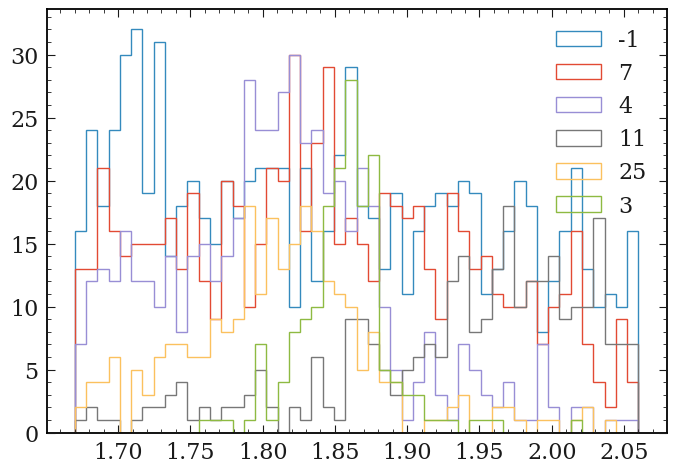

In [193]:
draw_components(pd_Vgamma_ccbar, 0.5)

In [172]:
pd_Vgamma_ccbar


,D0_M,D0_cosHel_0,iCascDcyBrP_Dst_0
0,1.871089,-0.054419,0
1,1.692476,0.959420,1
2,1.748360,-0.939232,2
3,1.864757,0.389204,0
4,1.873570,-0.495824,0
...,...,...,...
7654,1.741258,0.974491,4
7655,1.739924,0.983963,4
7656,1.758765,-0.788403,167
7657,1.821919,0.238473,7
